# Praktikum: Session 1

# Clustern der Iris-Daten
Clustern von Daten ist eine typische *unsupervised* Aufgabe. Dabei sollen nicht-gelabelten Daten in mehrere Gruppen ("Cluster") unterteilt werden.

Wir wollen dies konkret anhand der klassischen Iris-Daten machen. *Wir verwenden hier nur die vierdimensionalen Daten, die Labels werden NICHT verwendet.*

Wir beginnen mit Imports für die Grafik:

In [1]:
%matplotlib inline
import seaborn as sns; sns.set()

## 1. Clustern mit K-Means:
[Video](https://mstream.hm.edu/paella/ui/watch.html?id=611b7c44-1713-4017-a661-395ab3638794)

Vorgehen entlang der 5 Schritte

### 1. Wähle Modellklasse

Wir wollen K-Means Clustering verwenden. Importieren Sie diese aus ``sklearn.cluster``.

*Hinweis: Wie genau die Modellklasse heißt, können Sie sich anzeigen lassen, indem Sie den Anfangsbuchstaben eingeben und dann kurz auf die Code-Vervollständigung warten.*

In [4]:
from sklearn.cluster import KMeans, k_means

In [5]:
k_means?

### 2. Wähle Modellparameter
Informieren Sie sich, welche Parameter das Modell benötigt und wählen Sie diese passend. Geben Sie dem Modell den Namen ``model_KM``.

In [3]:
KMeans?

In [4]:
model_KM = KMeans(n_clusters=3)

### 3. Bereite Daten vor
Laden Sie die Iris Daten. Verschaffen Sie sich einen Überblick, wie die Daten strukturiert sind.

*Hinweise:*
- Die Iris Daten sind u.a. in der Bibliothek ``seaborn`` enthalten. Dort gibt es eine Funktion namens ``load_dataset``.
- Durch Aufrufen von ``meine_daten.head()`` werden die ersten fünf Zeilen des DataFrame ``meine_daten`` angezeigt.




In [5]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Plotten Sie die Daten, um einen Eindruck zu bekommen, ob ein Clustering vielversprechend ist.
*Hinweis: Verwenden Sie eine ``plot``-Funktion von Seaborn. Die automatische Code-Vervollständigung kann Ihnen zeigen, welche Funktionen es gibt, die **plot** im Namen haben.*

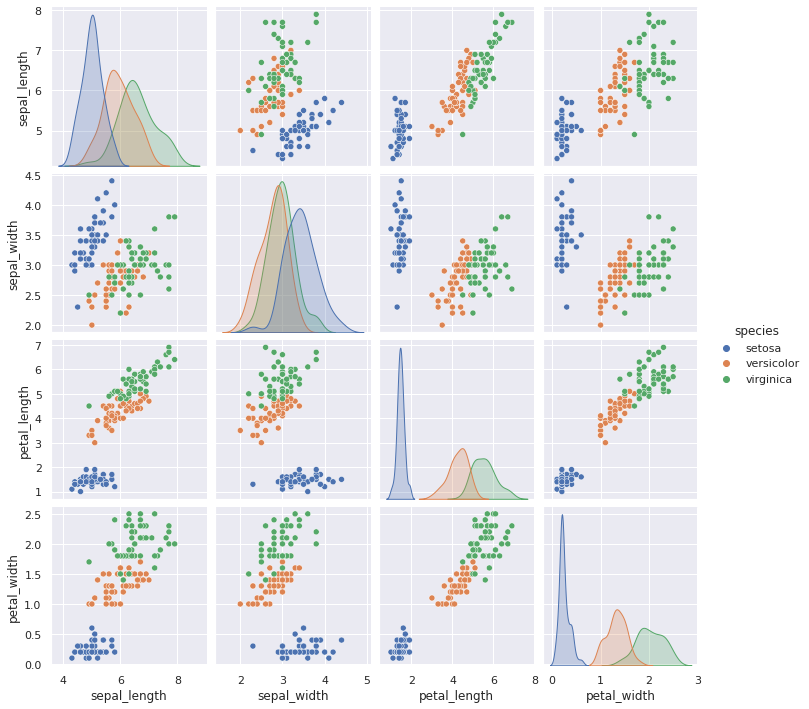

In [6]:
sns.pairplot(iris, hue='species')

Extrahieren Sie aus den eingelesenen Daten die Features-Matrix ``X_iris`` und den Labels-Vektor ``y_iris``.

*Hinweise:*
- Aus einem DataFrame ``df`` können Spalten entfernt werden durch ``df.drop(['Namen der Spalten', 'die entfernt werden sollen'], axis=1)``
- Auf eine einzelne Spalte eines DataFrame ``df`` kann zugegriffen werden durch ``df['Name der Spalte']``

In [7]:
import seaborn as sns
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

### 4. Passe das Modell an die Daten an

In [8]:
model_KM.fit(X_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 5. Wende das Modell an
Verwenden Sie das erzeugte Modell, um die Datensätze zu clustern.

Konkret heißt das, dass für jeden einzelnen Datensatz vorhergesagt werden soll, in welchen Cluster er gehört. Schauen Sie sich an, in welcher Form diese Information durch das Modell bereitgestellt wird.

*Hinweis: Verwenden Sie die ``predict`` Methode.*

In [9]:
y_KM = model_KM.predict(X_iris)

In [10]:
y_KM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

### 6. Betrachte Ergebnis


Fügen Sie zunächst die in Schritt 5. erzeugten Cluster-Daten dem Iris-Datensatz hinzu.

*Hinweis: Einem DataFrame ``df`` kann ein Array ``array`` als neue Spalte hinzugefügt werden durch ``df['Gewünschter Name der neuen Spalte'] = array``.*

In [11]:
iris['cluster_KM'] = y_KM

Verwenden Sie die Funktion ``sns.lmplot``, um die Iris Daten entlang zweier von Ihnen gewählten Features darzustellen. Die Färbung soll gem. des Labels ``species`` gewählt werden. Die Zugehörigkeit zu den Clustern gem. dem K-Means Modell soll dadurch dargestellt werden, dass jeder Cluster seinen eigenen Subplot erhält.

*Hinweis: Verwenden Sie ``sns.lmplot("Name Feature 1", "Name Feature 2", data=iris, hue='nach was gefärbt werden soll', col='nach was die Subplots erstellt werden sollen', fit_reg=False)``*

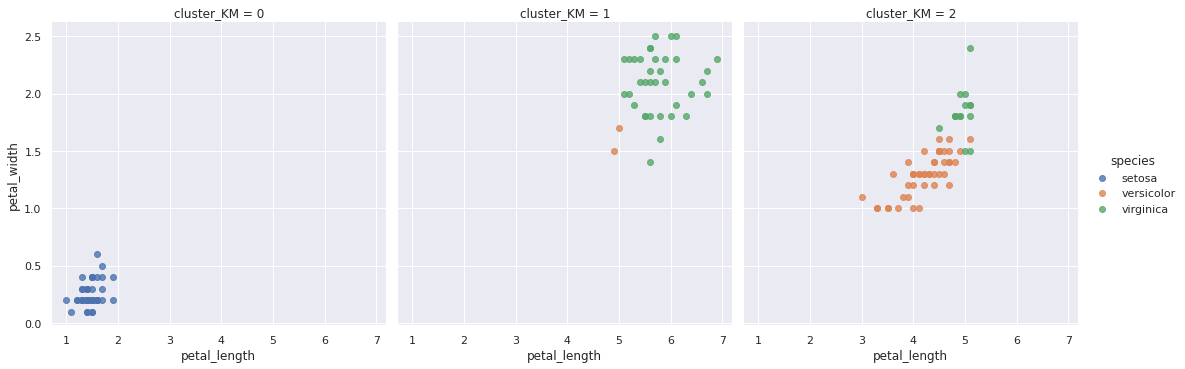

In [13]:
sns.lmplot(x="petal_length", y="petal_width", data=iris, hue='species', col='cluster_KM', fit_reg=False);

## 2. Clustern mit Gaussian Mixture Model
[Video](https://mstream.hm.edu/paella/ui/watch.html?id=73035795-eb1c-4199-8bdf-f13e6fff543e)

Vorgehen entlang der 5 Schritte

### 1. Wähle Modellklasse
Nun soll zum Clustern ein sog. Gaussian Mixture Model verwendet werden.

*Hinweis: Dieses befindet sich in ``sklearn.mixture``.*

In [14]:
from sklearn.mixture import GaussianMixture

###2. Wähle Modellparameter


Informieren Sie sich, welche Parameter das Modell benötigt und wählen Sie diese passend. Geben Sie dem Modell den Namen ``model_GMM``.

In [15]:
model_GMM = GaussianMixture(n_components=3, covariance_type='full')

###3. Bereite Daten vor
Die Iris Daten sind ja bereits geladen und somit noch immer verfügbar. Extrahieren Sie daraus die Features-Matrix ``X_iris`` und den Labels-Vektor ``y_iris``.

*Hinweis: Sie hatten in Teil 1 die Iris Daten verändert, indem Sie das Ergebnis des Clusterings hinzugefügt haben. Stellen Sie sicher, dass ``X_iris`` und ``y_iris`` korrekt sind. Eine gute Möglichkeit wäre es, die Daten noch einmal zu betrachten (``head()``).*

In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_KM
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [17]:
X_iris = iris.drop(['species', 'cluster_KM'], axis=1)
y_iris = iris['species']

###4. Passe das Modell an die Daten an

In [18]:
model_GMM.fit(X_iris)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

###5. Wende das Modell an
Verwenden Sie das neu erzeugte Modell, um die Datensätze zu clustern.

Konkret heißt das, dass für jeden einzelnen Datensatz vorhergesagt werden soll, in welchen Cluster er gehört. Schauen Sie sich an, in welcher Form diese Information durch das Modell bereitgestellt wird.

*Hinweis: Verwenden Sie die ``predict`` Methode.*

In [19]:
y_GMM = model_GMM.predict(X_iris)
y_GMM

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

###6. Betrachte Ergebnis
Fügen Sie zunächst die in Schritt 5 erzeugten neuen Clusterdaten dem Iris-Datensatz hinzu.

In [20]:
iris['cluster_GMM'] = y_GMM

In [21]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_KM,cluster_GMM
0,5.1,3.5,1.4,0.2,setosa,0,1
1,4.9,3.0,1.4,0.2,setosa,0,1
2,4.7,3.2,1.3,0.2,setosa,0,1
3,4.6,3.1,1.5,0.2,setosa,0,1
4,5.0,3.6,1.4,0.2,setosa,0,1


Verwenden Sie die Funktion ``sns.lmplot``, um die Iris Daten entlang zweier von Ihnen gewählten Features darzustellen. Die Färbung soll gem. des Labels ``species`` gewählt werden.
Die Zugehörigkeit zu den Clustern gem. dem K-Means Modell soll weiterhin dadurch dargestellt werden, dass jeder Cluster seinen eigenen Subplot innerhalb einer Zeile erhält.
Die Zugehörigkeit zu den Clustern gem. dem Gaussian Mixture Modell soll  dadurch dargestellt werden, dass jeder Cluster seinen eigenen Subplot innerhalb einer *Spalte* erhält.

Somit ergiben sich 9 Subplots angeordnet in einem 3x3 Schema. Dabei gilt:
- eine Zeile enthält alle Punkte eines GMM-Clusters;
- eine Spalte enthält alle Punkte eines KM-Clusters.

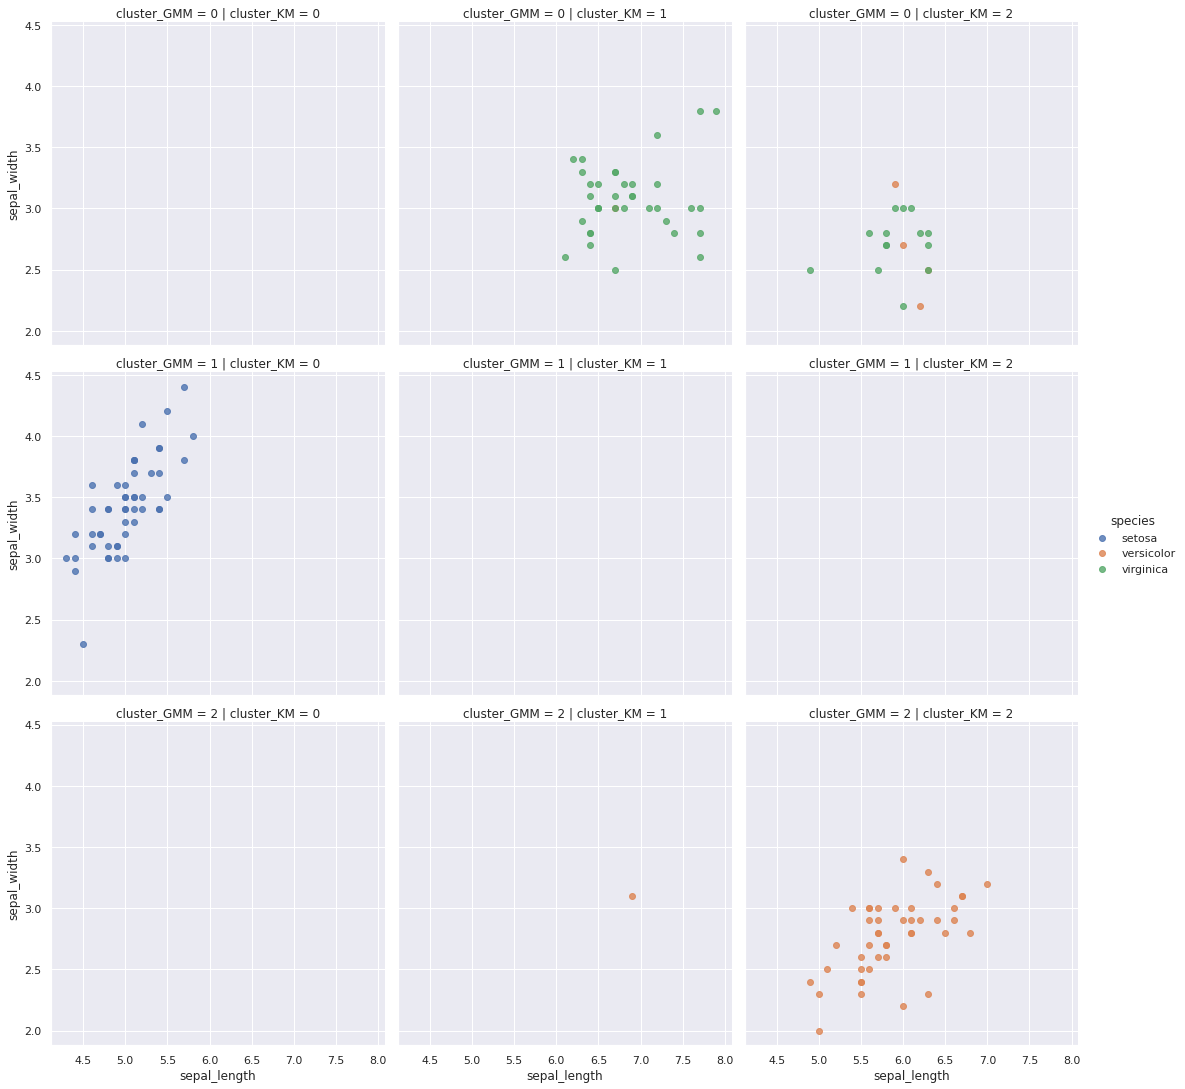

In [22]:
sns.lmplot(x="sepal_length", y="sepal_width", data=iris, hue='species', col='cluster_KM', row='cluster_GMM', fit_reg=False);

Interpretieren Sie die Grafik. Welches Clustering ist besser?

In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_KM,cluster_GMM
0,5.1,3.5,1.4,0.2,setosa,0,1
1,4.9,3.0,1.4,0.2,setosa,0,1
2,4.7,3.2,1.3,0.2,setosa,0,1
3,4.6,3.1,1.5,0.2,setosa,0,1
4,5.0,3.6,1.4,0.2,setosa,0,1


In [25]:
iris.loc[iris.cluster_KM==2].loc[iris.cluster_GMM==0]

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_KM,cluster_GMM
68,6.2,2.2,4.5,1.5,versicolor,2,0
70,5.9,3.2,4.8,1.8,versicolor,2,0
72,6.3,2.5,4.9,1.5,versicolor,2,0
83,6.0,2.7,5.1,1.6,versicolor,2,0
101,5.8,2.7,5.1,1.9,virginica,2,0
106,4.9,2.5,4.5,1.7,virginica,2,0
113,5.7,2.5,5.0,2.0,virginica,2,0
114,5.8,2.8,5.1,2.4,virginica,2,0
119,6.0,2.2,5.0,1.5,virginica,2,0
121,5.6,2.8,4.9,2.0,virginica,2,0


## 3. Daten mit besonderer Struktur
Nun betrachten wir künstlich generierte Daten mit einer besonderen Struktur. Wir wollen vergleichen, wie die beiden Algorithmen darauf performen.

Führen Sie die beiden folgenden Zellen aus, um die Daten zu generieren. Diese liegen dann analog zu den Iris Daten als ``DataFrame`` Objekt mit Namen ``df`` und auch als ``ndarray`` mit Namen ``X_aniso`` vor.

In [26]:
import numpy as np
import pandas as pd

from sklearn import datasets

In [27]:
n_samples = 1500
# Anisotropicly distributed data
random_state = 170
X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
df = pd.DataFrame({'x':X_aniso[:,0], 'y':X_aniso[:,1]})

Betrachten Sie die Daten und erzeugen Sie einen Plot. Welche Struktur fällt Ihnen auf, d.h. wie sollte ein Algorithmus diese Daten clustern?

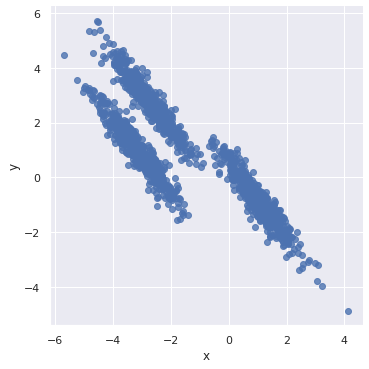

In [29]:
sns.lmplot(x='x',y='y', data=df, fit_reg=False)

### Clustern mit K-Means
Verwenden Sie den K-Means-Algorithmus um die Daten zu clustern. Visualisieren Sie das Ergebnis und bewerten Sie es basierend darauf.

In [30]:
model = KMeans(n_clusters=3)
model.fit(X_aniso)
group_model = model.predict(X_aniso)
df['group_model'] = group_model

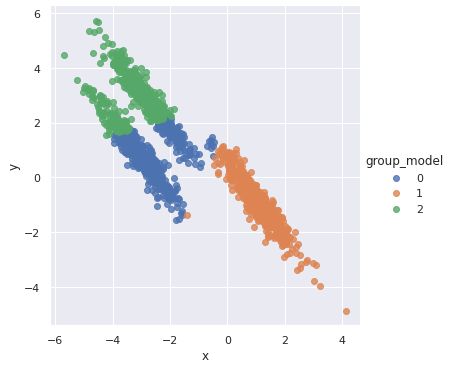

In [32]:
sns.lmplot(x='x',y='y', data=df, hue='group_model', fit_reg=False)

### Clustern mit GMM
Verwenden Sie ein Gaussian Mixture Model um die Daten zu clustern. Visualisieren Sie das Ergebnis und bewerten Sie es basierend darauf.

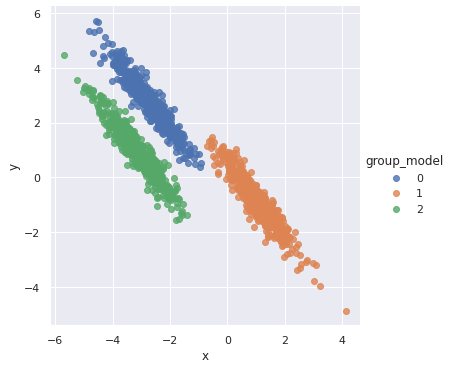

In [33]:
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_aniso)
group_model = model.predict(X_aniso)
df['group_model'] = group_model
sns.lmplot(x='x',y='y', data=df, hue='group_model', fit_reg=False)